#Statistical Analysis of Extracted features of MLSH dataset for all records

##Import data and Clean the data

In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
df = pd.read_excel('/content/MLSH-dataset-L1.xlsx')

In [ ]:
#Check for information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Participant  493 non-null    int64  
 1   Category     493 non-null    object 
 2   NN_RR        493 non-null    float64
 3   AVNN         493 non-null    float64
 4   IHR          493 non-null    float64
 5   SDNN         493 non-null    float64
 6   SDANN        493 non-null    float64
 7   SDNNIDX      493 non-null    float64
 8   rMSSD        493 non-null    float64
 9   pNN10        493 non-null    float64
 10  pNN20        493 non-null    float64
 11  pNN30        493 non-null    float64
 12  pNN40        493 non-null    float64
 13  pNN50        493 non-null    float64
 14  tot_pwr      493 non-null    float64
 15  ULF          493 non-null    float64
 16  VLF          493 non-null    float64
 17  LF           493 non-null    float64
 18  HF           493 non-null    float64
 19  LF_HF   

In [ ]:
#Look into the first 5rows of dataset
df.head()

,Participant,Category,NN_RR,AVNN,IHR,SDNN,SDANN,SDNNIDX,rMSSD,pNN10,pNN20,pNN30,pNN40,pNN50,tot_pwr,ULF,VLF,LF,HF,LF_HF,LF_n,HF_n
0,0,A,0.999970,836.336,71.741501,74.9342,45.5641,55.4628,25.1387,61.3931,29.6775,16.4170,6.17343,3.44122,5852.65,2675.950,2082.66,847.965,246.077,3.44593,0.775075,0.224925
1,1,A,0.999680,980.794,61.174926,86.4631,57.3369,55.6853,26.9386,60.9649,26.4666,14.1151,6.12600,3.87186,8793.63,4467.600,3145.01,985.214,195.798,5.03179,0.834212,0.165788
2,2,A,0.993108,1000.260,59.984404,59.7562,32.5391,47.8997,31.0587,59.4547,29.5596,19.1820,10.53270,7.39094,3723.20,1336.050,1322.78,802.306,262.058,3.06156,0.753789,0.246211
3,3,A,0.959997,787.438,76.196475,59.2220,27.0160,39.2539,43.5362,29.7286,13.7209,12.5419,11.46800,10.68200,2813.47,761.872,1339.35,361.275,350.971,1.02936,0.507233,0.492767
4,4,B,0.999689,973.366,61.641767,117.9690,67.9543,89.0453,73.9128,86.7052,72.8064,63.7922,51.80280,44.24510,14734.80,6590.450,4729.39,2354.480,1060.520,2.22012,0.689452,0.310548


##Descriptive statistical analysis

In [ ]:
#Get descriptive statistics of  dataset
df.describe()

,Participant,NN_RR,AVNN,IHR,SDNN,SDANN,SDNNIDX,rMSSD,pNN10,pNN20,pNN30,pNN40,pNN50,tot_pwr,ULF,VLF,LF,HF,LF_HF,LF_n,HF_n
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,246.000000,0.981825,968.160154,63.159077,78.424024,54.558257,52.119256,37.225187,62.116038,34.741182,24.231103,14.806811,10.998587,7604.396846,3788.795093,2077.903732,1098.025386,639.678918,2.438171,0.647561,0.352439
std,142.461106,0.052348,133.007471,8.840921,26.130325,22.330160,21.442332,22.873266,16.583218,19.355675,17.646819,14.395127,12.462205,5812.225631,3097.535438,1860.045593,1449.400257,997.077270,1.674405,0.146650,0.146650
min,0.000000,0.505680,603.824000,42.931660,16.380600,14.341600,6.164800,5.234500,1.763530,1.063760,0.346649,0.097961,0.062339,283.458000,229.128000,43.255000,7.756420,3.318810,0.199845,0.166559,0.085771
25%,123.000000,0.992511,883.495000,56.828945,60.216500,40.613500,36.929600,23.234800,50.975200,18.801200,9.540980,3.615990,1.906120,3916.660000,1853.600000,943.774000,398.854000,177.395000,1.187020,0.542756,0.231103
50%,246.000000,0.998159,957.889000,62.637738,74.772200,50.316300,48.272600,31.836300,65.059300,33.865700,21.129800,10.237200,6.424260,6182.740000,2908.120000,1582.190000,718.052000,372.857000,2.042320,0.671303,0.328697
75%,369.000000,0.999495,1055.800000,67.912099,90.530900,64.152700,62.171600,43.648000,75.042200,48.908100,35.519700,21.340600,15.917300,9278.530000,4590.610000,2575.980000,1296.960000,659.454000,3.327080,0.768897,0.457244
max,492.000000,0.999971,1397.570000,99.366703,213.697000,256.855000,187.348000,204.545000,92.095300,82.915300,77.974800,72.164500,68.938400,48863.700000,31032.300000,16863.600000,22251.300000,9287.110000,10.659000,0.914229,0.833441


In [ ]:
#Create new feature: Patient_status
df['Patient_status'] = ''
#Patient_status feature is updated with values
df.loc[df['Category'] == 'A', 'Patient_status'] = 'Patient'
df.loc[df['Category'] == 'B', 'Patient_status'] = 'Healthy'
df

,Participant,Category,NN_RR,AVNN,IHR,SDNN,SDANN,SDNNIDX,rMSSD,pNN10,pNN20,pNN30,pNN40,pNN50,tot_pwr,ULF,VLF,LF,HF,LF_HF,LF_n,HF_n,Patient_status
0,0,A,0.999970,836.336,71.741501,74.9342,45.5641,55.4628,25.1387,61.3931,29.6775,16.41700,6.173430,3.441220,5852.65,2675.950,2082.660,847.965,246.0770,3.44593,0.775075,0.224925,Patient
1,1,A,0.999680,980.794,61.174926,86.4631,57.3369,55.6853,26.9386,60.9649,26.4666,14.11510,6.126000,3.871860,8793.63,4467.600,3145.010,985.214,195.7980,5.03179,0.834212,0.165788,Patient
2,2,A,0.993108,1000.260,59.984404,59.7562,32.5391,47.8997,31.0587,59.4547,29.5596,19.18200,10.532700,7.390940,3723.20,1336.050,1322.780,802.306,262.0580,3.06156,0.753789,0.246211,Patient
3,3,A,0.959997,787.438,76.196475,59.2220,27.0160,39.2539,43.5362,29.7286,13.7209,12.54190,11.468000,10.682000,2813.47,761.872,1339.350,361.275,350.9710,1.02936,0.507233,0.492767,Patient
4,4,B,0.999689,973.366,61.641767,117.9690,67.9543,89.0453,73.9128,86.7052,72.8064,63.79220,51.802800,44.245100,14734.80,6590.450,4729.390,2354.480,1060.5200,2.22012,0.689452,0.310548,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,488,A,0.999909,896.956,66.892913,49.6962,33.7220,35.5952,14.1085,44.0056,10.0732,3.19682,0.667901,0.336987,2842.36,1224.280,1182.250,367.972,67.8646,5.42215,0.844289,0.155711,Patient
489,489,A,0.999613,960.321,62.479109,47.8440,30.9820,33.3016,22.3293,62.0253,26.5478,12.24490,3.539140,1.623180,2492.80,1101.070,920.625,313.928,157.1760,1.99730,0.666367,0.333633,Patient
490,490,B,0.999880,963.138,62.296369,64.8168,52.4380,39.0670,19.2998,56.3310,22.5962,11.47760,4.000000,1.730810,4990.76,2560.220,1680.300,577.137,173.1090,3.33395,0.769264,0.230736,Healthy
491,491,A,0.977802,986.468,60.823058,45.1182,35.0136,29.3724,20.6881,62.0366,26.5893,13.09090,4.074400,1.903460,2256.99,1260.840,587.957,232.695,175.4900,1.32597,0.570072,0.429928,Patient


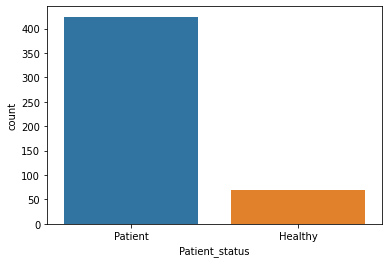

In [ ]:
#Plot for counting Patient_status
sns.countplot(data=df, x='Patient_status')

Using the Weka software I have analyzed  distribution of features and corresponding plots are provided below.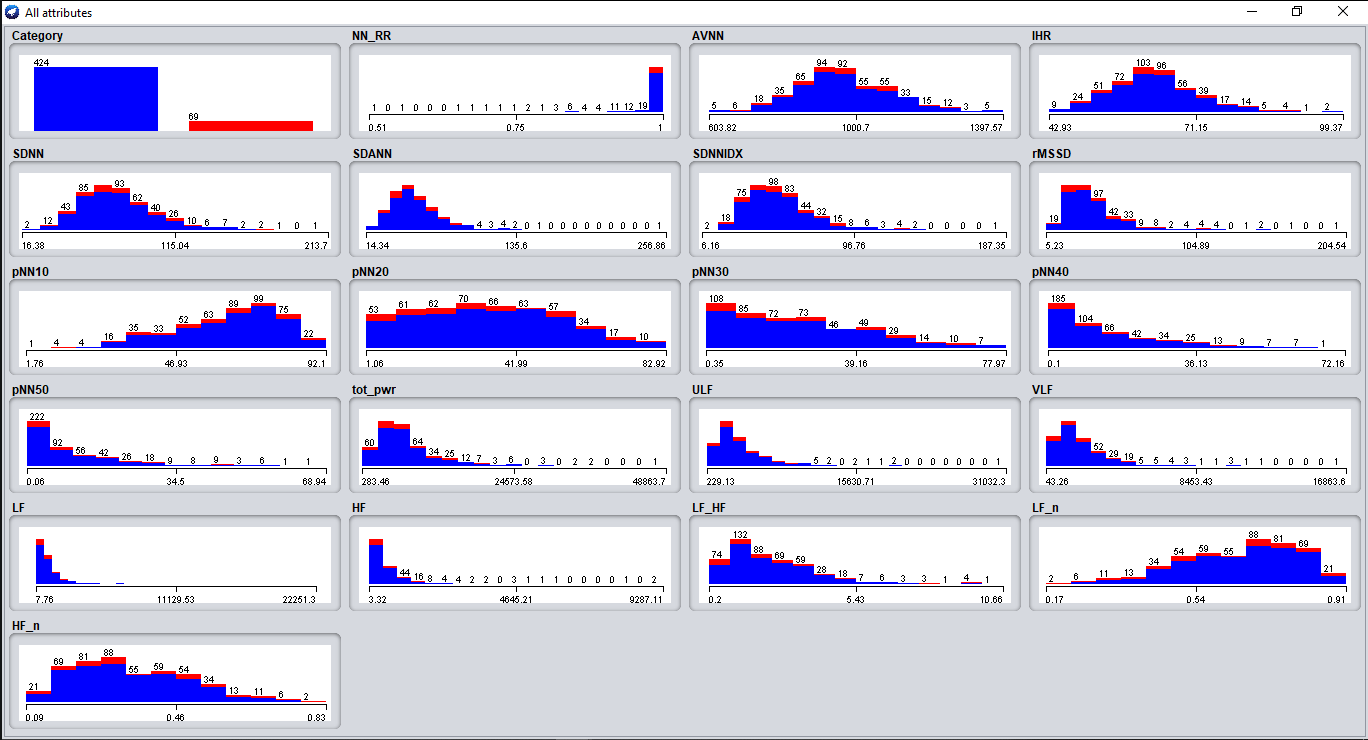

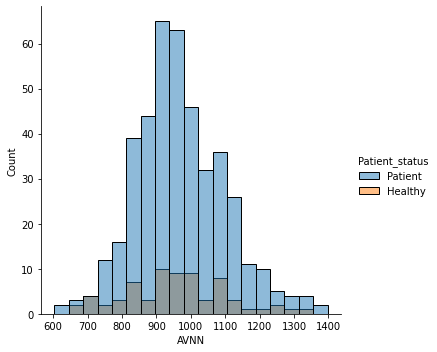

In [ ]:
#Plot for Patient status based on AVNN
sns.displot(df, x='AVNN',hue='Patient_status')

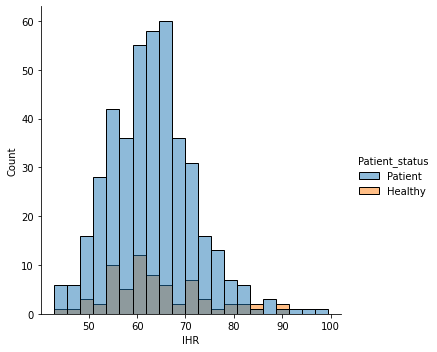

In [ ]:
#Plot for Patient status based on AVNN
sns.displot(df, x='IHR',hue='Patient_status')

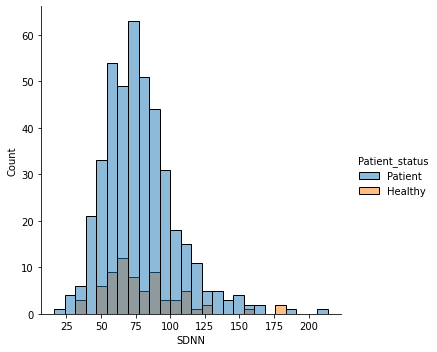

In [ ]:
#Plot for Patient status based on AVNN
sns.displot(df, x='SDNN',hue='Patient_status')

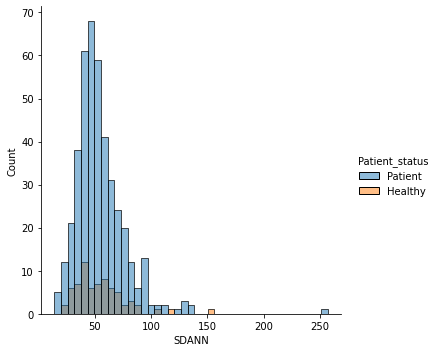

In [ ]:
#Plot for Patient status based on SDANN
sns.displot(df, x='SDANN',hue='Patient_status')

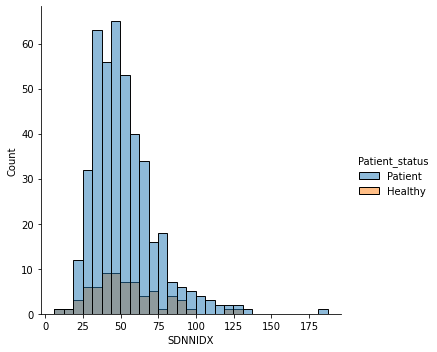

In [ ]:
#Plot for Patient status based on SDNNIDX
sns.displot(df, x='SDNNIDX',hue='Patient_status')

Healthy people seem to have a lower IHR, SDNN, SDANN, SDNNIDX and AVNN when compared to the sleepapnea patients.


##Inferential statistical analysis

###**Performed T-tests (for normally distributed features: IHR, SDNN, SDANN, SDNNIDX and AVNN) to determine if there is a significant difference between means of patient and healthy categories.**

####**1. Determine if there is significant difference in IHR of Patient and Healthy**

Null Hypothesis is no difference between Patient and Healthy

Alternative hypothesis is there is a difference between Patient and Healthy

Significance level is 0.05

Variable input is Binary as Patient and Healthy

The variable response 'IHR' is continuous value.

Responses are not paired by the groups, they are independent groups.

It's alterative is two tailed.

Normal distribution is showing up in the plot.


In [ ]:
#import required libraries
from scipy.stats import ttest_ind
import scipy.stats as stats

In [ ]:
IHR_Patient = df.loc[df["Patient_status"] =='Patient', "IHR"]
IHR_Healthy = df.loc[df["Patient_status"] =='Healthy', "IHR"] 

In [ ]:
ttest_IHR = ttest_ind(IHR_Healthy , IHR_Patient , equal_var=True )
ttest_IHR

Ttest_indResult(statistic=0.8626219352489725, pvalue=0.3887664936793025)

**P-value > 0.05 . Fail to reject the null hypothesis. There is no significant difference in IHR of Patient and Healthy**

####**2. Determine if there is significant difference in SDNN of Patient and Healthy**

Null Hypothesis is no difference between Patient and Healthy

Alternative hypothesis is there is a difference between Patient and Healthy

Significance level is 0.05

Variable input is Binary as Patient and Healthy

The variable response 'SDNN' is continuous value.

Responses are not paired by the groups, they are independent groups.

It's alterative is two tailed.

Normal distribution is showing up in the plot.


In [ ]:
SDNN_Patient = df.loc[df["Patient_status"] =='Patient', "SDNN"]
SDNN_Healthy = df.loc[df["Patient_status"] =='Healthy', "SDNN"] 

In [ ]:
ttest_SDNN = ttest_ind(SDNN_Healthy , SDNN_Patient , equal_var=True )
ttest_SDNN

Ttest_indResult(statistic=0.6764440501128773, pvalue=0.49907727753571063)

**P-value > 0.05 . Fail to reject the null hypothesis. There is no significant difference in SDNN of Patient and Healthy**

####**3. Determine if there is significant difference in SDANN of Patient and Healthy**

Null Hypothesis is no difference between Patient and Healthy

Alternative hypothesis is there is a difference between Patient and Healthy

Significance level is 0.05

Variable input is Binary as Patient and Healthy

The variable response 'SDANN' is continuous value.

Responses are not paired by the groups, they are independent groups.

It's alterative is two tailed.

Normal distribution is showing up in the plot.


In [ ]:
SDANN_Patient = df.loc[df["Patient_status"] =='Patient', "SDANN"]
SDANN_Healthy = df.loc[df["Patient_status"] =='Healthy', "SDANN"] 

In [ ]:
ttest_SDANN = ttest_ind(SDANN_Healthy , SDANN_Patient , equal_var=True )
ttest_SDANN

Ttest_indResult(statistic=0.19454635015002486, pvalue=0.8458285747287833)

**P-value > 0.05 . Fail to reject the null hypothesis. There is no significant difference in SDANN of Patient and Healthy**

####**4. Determine if there is significant difference in SDNNIDX of Patient and Healthy**

Null Hypothesis is no difference between Patient and Healthy

Alternative hypothesis is there is a difference between Patient and Healthy

Significance level is 0.05

Variable input is Binary as Patient and Healthy

The variable response 'SDNNIDX' is continuous value.

Responses are not paired by the groups, they are independent groups.

It's alterative is two tailed.

Normal distribution is showing up in the plot.


In [ ]:
SDNNIDX_Patient = df.loc[df["Patient_status"] =='Patient', "SDNNIDX"]
SDNNIDX_Healthy = df.loc[df["Patient_status"] =='Healthy', "SDNNIDX"] 

In [ ]:
ttest_SDNNIDX = ttest_ind(SDNNIDX_Healthy , SDNNIDX_Patient , equal_var=True )
ttest_SDNNIDX

Ttest_indResult(statistic=0.5823009416078738, pvalue=0.5606312755786298)

**P-value > 0.05 . Fail to reject the null hypothesis. There is no significant difference in SDANN of Patient and Healthy**

####**5. Determine if there is significant difference in AVNN of Patient and Healthy**

Null Hypothesis is no difference between Patient and Healthy

Alternative hypothesis is there is a difference between Patient and Healthy

Significance level is 0.05

Variable input is Binary as Patient and Healthy

The variable response 'AVNN' is continuous value.

Responses are not paired by the groups, they are independent groups.

It's alterative is two tailed.

Normal distribution is showing up in the plot.


In [ ]:
AVNN_Patient = df.loc[df["Patient_status"] =='Patient', "AVNN"]
AVNN_Healthy = df.loc[df["Patient_status"] =='Healthy', "AVNN"] 

In [ ]:
ttest_AVNN = ttest_ind(AVNN_Patient , AVNN_Healthy , equal_var=True )
ttest_AVNN

Ttest_indResult(statistic=0.557226878811793, pvalue=0.5776263485339017)

**P-value > 0.05 . Fail to reject the null hypothesis. There is no significant difference in AVNN of Patient and Healthy**

###**Performed U-tests (for not normally distributed features: LF and HF) to determine if there is a significant difference between means of patient and healthy categories.**

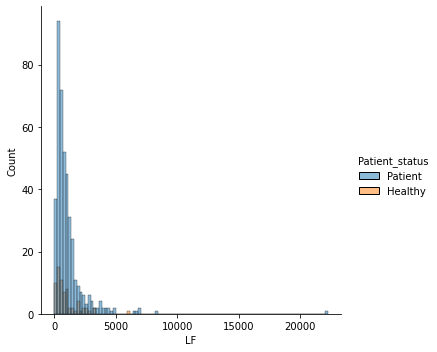

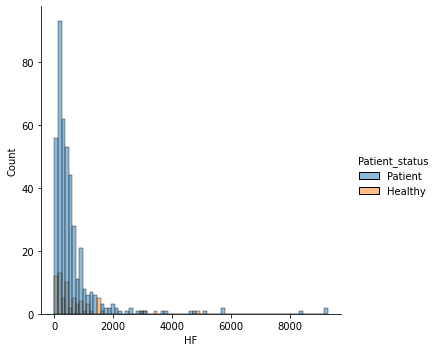

In [ ]:
#Plot for Patient status based on LF and HF
sns.displot(df, x='LF',hue='Patient_status')
sns.displot(df, x='HF',hue='Patient_status')

####**1. Determine if there is significant difference in LF of Patient and Healthy**

Null Hypothesis is no difference between Patient and Healthy

Alternative hypothesis is there is a difference between Patient and Healthy

Significance level is 0.05

Variable input is Binary as Patient and Healthy

The variable response 'LF' is continuous value.

Responses are not paired by the groups, they are independent groups.

It's alterative is two tailed.

Normal distribution is NOT showing up in the plot.


In [ ]:
LF_Patient = df.loc[df["Patient_status"] =='Patient', "LF"]
LF_Healthy = df.loc[df["Patient_status"] =='Healthy', "LF"] 

In [ ]:
Utest_LF = stats.mannwhitneyu(LF_Patient , LF_Healthy , alternative='two-sided' )
Utest_LF

MannwhitneyuResult(statistic=15388.0, pvalue=0.48889594285603855)

**P-value > 0.05 . Fail to reject the null hypothesis. There is no significant difference in LF of Patient and Healthy**

####**2. Determine if there is significant difference in HF of Patient and Healthy**

Null Hypothesis is no difference between Patient and Healthy

Alternative hypothesis is there is a difference between Patient and Healthy

Significance level is 0.05

Variable input is Binary as Patient and Healthy

The variable response 'HF' is continuous value.

Responses are not paired by the groups, they are independent groups.

It's alterative is two tailed.

Normal distribution is NOT showing up in the plot.


In [ ]:
HF_Patient = df.loc[df["Patient_status"] =='Patient', "HF"]
HF_Healthy = df.loc[df["Patient_status"] =='Healthy', "HF"] 

In [ ]:
Utest_HF = stats.mannwhitneyu(HF_Patient , HF_Healthy , alternative='two-sided' )
Utest_HF

MannwhitneyuResult(statistic=13831.0, pvalue=0.4679731795739839)

**P-value > 0.05 . Fail to reject the null hypothesis. There is no significant difference in LF of Patient and Healthy**